# SuperMarket Analysis

In [32]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
color = sns.color_palette()
sns.set_style('darkgrid')

from scipy.stats import norm, skew #for some statistics


In [33]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [34]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [35]:
#removemos los espacios en blanco de los features
df.columns= df.columns.str.replace(' ','_')
df.columns

Index(['Invoice_ID', 'Branch', 'City', 'Customer_type', 'Gender',
       'Product_line', 'Unit_price', 'Quantity', 'Tax_5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross_margin_percentage', 'gross_income',
       'Rating'],
      dtype='object')

In [36]:
#Borramos el identicador, no nos hace falta
df=df.drop(['Invoice_ID'], axis=1)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer_type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product_line             1000 non-null   object 
 5   Unit_price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax_5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross_margin_percentage  1000 non-null   float64
 14  gross_income             

In [38]:
cat_columns = [cname for cname in df.columns if df[cname].dtype == "object"]
cat_columns

['Branch',
 'City',
 'Customer_type',
 'Gender',
 'Product_line',
 'Date',
 'Time',
 'Payment']

In [39]:
#observamos que valores tienen los features (menos Date y Time que ya nos lo imaginamos)
for i in cat_columns:
    if i != 'Date' and i!= 'Time':
        print("%s tiene %d elementos: %s"%(i, len(df[i].unique().tolist()), df[i].unique().tolist()))

Branch tiene 3 elementos: ['A', 'C', 'B']
City tiene 3 elementos: ['Yangon', 'Naypyitaw', 'Mandalay']
Customer_type tiene 2 elementos: ['Member', 'Normal']
Gender tiene 2 elementos: ['Female', 'Male']
Product_line tiene 6 elementos: ['Health and beauty', 'Electronic accessories', 'Home and lifestyle', 'Sports and travel', 'Food and beverages', 'Fashion accessories']
Payment tiene 3 elementos: ['Ewallet', 'Cash', 'Credit card']


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer_type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product_line             1000 non-null   object 
 5   Unit_price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax_5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Date                     1000 non-null   object 
 10  Time                     1000 non-null   object 
 11  Payment                  1000 non-null   object 
 12  cogs                     1000 non-null   float64
 13  gross_margin_percentage  1000 non-null   float64
 14  gross_income             

In [41]:
df.describe()

,Unit_price,Quantity,Tax_5%,Total,cogs,gross_margin_percentage,gross_income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [42]:
# checking shape
print("The dataset has {} rows and {} columns.".format(*df.shape))

# ... and duplicates
print("It contains {} duplicates.".format(df.duplicated().sum()))

The dataset has 1000 rows and 16 columns.
It contains 0 duplicates.


In [43]:
#Vemos a ver cuantosdatos tenemos perdidos (vemos que no hay)

total = df.isnull().sum().sort_values(ascending=False) #total de valores perdidos por columna ordenados 
#Porcentaje de valores perdidos respecto al total de cada columna
percent = ((df.isnull().sum())*100)/df.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data.head(10)

,Total,Percent
Rating,0,0.0
gross_income,0,0.0
gross_margin_percentage,0,0.0
cogs,0,0.0
Payment,0,0.0
Time,0,0.0
Date,0,0.0
Total,0,0.0
Tax_5%,0,0.0
Quantity,0,0.0


## Pasamos *'date'* y *'Time'* que son *Object* a formato *datetime*

In [44]:
df['Date'] = pd.to_datetime(df['Date'])
df['day'] = (df['Date']).dt.day
df['month'] = (df['Date']).dt.month
df['year'] = (df['Date']).dt.year

In [45]:
type(df['Date'])

pandas.core.series.Series

In [46]:
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = (df['Time']).dt.hour    #type(sales['Time'])
df['Hour'].nunique()  #gives us the number total of different unique hours 

11

In [47]:
  df['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12])

In [48]:
df['month'].unique()

array([1, 3, 2])

(0.0, 1251.18, 5.5, -0.5)

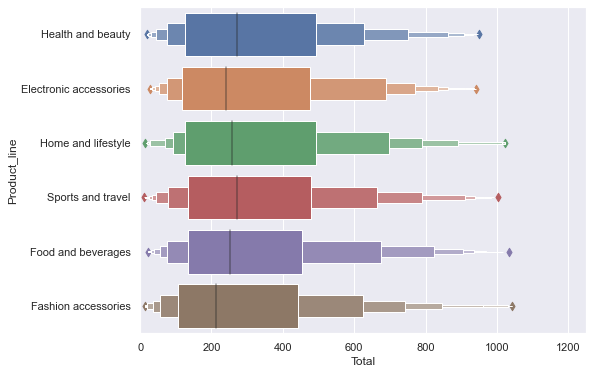

In [49]:
#box plot overallqual/saleprice
vary = 'Product_line'
varx = 'Total'
data = pd.concat([df[vary], df[varx]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxenplot(x=varx, y=vary, data=data)
fig.axis(xmin=0, xmax=df[varx].max()+df[varx].max()*0.2)

Text(0.5, 1.0, '')

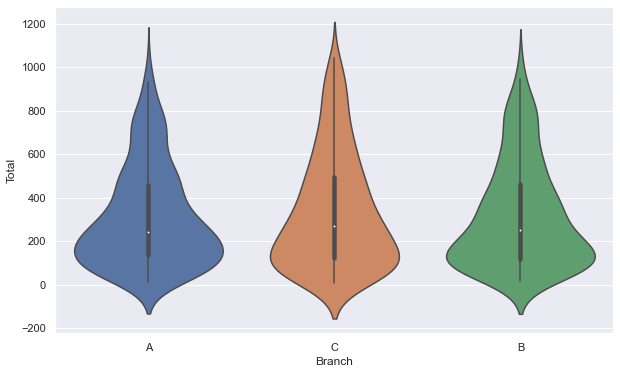

In [50]:
#Vamos a ver la densidad de la distribución de los precios usando violinplot
plt.figure(figsize=(10,6))

viz_2=sns.violinplot(data=df, x='Branch', y='Total',figsize=(20,20))
viz_2.set_title('')

## Exploratory Data Analysis *(EDA)*

### LabelEncoder

Codifica etiquetas de una característica categórica en valores numéricos entre `0` y el número de clases menos `1`. Dicho de otra forma, asignamos números a las variables categóricas para poder trabajar con ellas mejor.

In [51]:
from sklearn.preprocessing import LabelEncoder

#Señalamos las features categorics para asignarles a cada una una serie de números con LabelEncoder.
df2=df.copy()
cat_columns2= ['Branch','City','Customer_type','Gender','Product_line','Payment']
# process columns, apply LabelEncoder to categorical features
for c in cat_columns2:
    lbl = LabelEncoder() 
    lbl.fit(list(df2[c].values)) 
    df2[c] = lbl.transform(list(df2[c].values))

# shape        
print('Shape all_data: {}'.format(df2.shape))
df2.head()

Shape all_data: (1000, 20)


,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating,day,month,year,Hour
0,0,2,0,0,3,74.69,7,26.1415,548.9715,2019-01-05,2020-05-29 13:08:00,2,522.83,4.761905,26.1415,9.1,5,1,2019,13
1,2,1,1,0,0,15.28,5,3.8200,80.2200,2019-03-08,2020-05-29 10:29:00,0,76.40,4.761905,3.8200,9.6,8,3,2019,10
2,0,2,1,1,4,46.33,7,16.2155,340.5255,2019-03-03,2020-05-29 13:23:00,1,324.31,4.761905,16.2155,7.4,3,3,2019,13
3,0,2,0,1,3,58.22,8,23.2880,489.0480,2019-01-27,2020-05-29 20:33:00,2,465.76,4.761905,23.2880,8.4,27,1,2019,20
4,0,2,1,1,5,86.31,7,30.2085,634.3785,2019-02-08,2020-05-29 10:37:00,2,604.17,4.761905,30.2085,5.3,8,2,2019,10


## Variable categóricas a dummies

In [52]:
type('Branch')

str

In [53]:
def createDummies(df, var_name):
    df=df.copy()
    dummy = pd.get_dummies(df[var_name], prefix=var_name)
    df = df.drop(var_name, axis = 1)
    df = pd.concat([df, dummy ], axis = 1)
    return df
df3= createDummies(df, cat_columns2)

In [54]:
df3.head()

,Unit_price,Quantity,Tax_5%,Total,Date,Time,cogs,gross_margin_percentage,gross_income,Rating,...,Gender_Male,Product_line_Electronic accessories,Product_line_Fashion accessories,Product_line_Food and beverages,Product_line_Health and beauty,Product_line_Home and lifestyle,Product_line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,74.69,7,26.1415,548.9715,2019-01-05,2020-05-29 13:08:00,522.83,4.761905,26.1415,9.1,...,0,0,0,0,1,0,0,0,0,1
1,15.28,5,3.8200,80.2200,2019-03-08,2020-05-29 10:29:00,76.40,4.761905,3.8200,9.6,...,0,1,0,0,0,0,0,1,0,0
2,46.33,7,16.2155,340.5255,2019-03-03,2020-05-29 13:23:00,324.31,4.761905,16.2155,7.4,...,1,0,0,0,0,1,0,0,1,0
3,58.22,8,23.2880,489.0480,2019-01-27,2020-05-29 20:33:00,465.76,4.761905,23.2880,8.4,...,1,0,0,0,1,0,0,0,0,1
4,86.31,7,30.2085,634.3785,2019-02-08,2020-05-29 10:37:00,604.17,4.761905,30.2085,5.3,...,1,0,0,0,0,0,1,0,0,1


**df** $\to$ Dataset original

**df2** $\to$ Dataset con *LabelEncoder*

**df3** $\to$ Dataset con *variables Dummies*

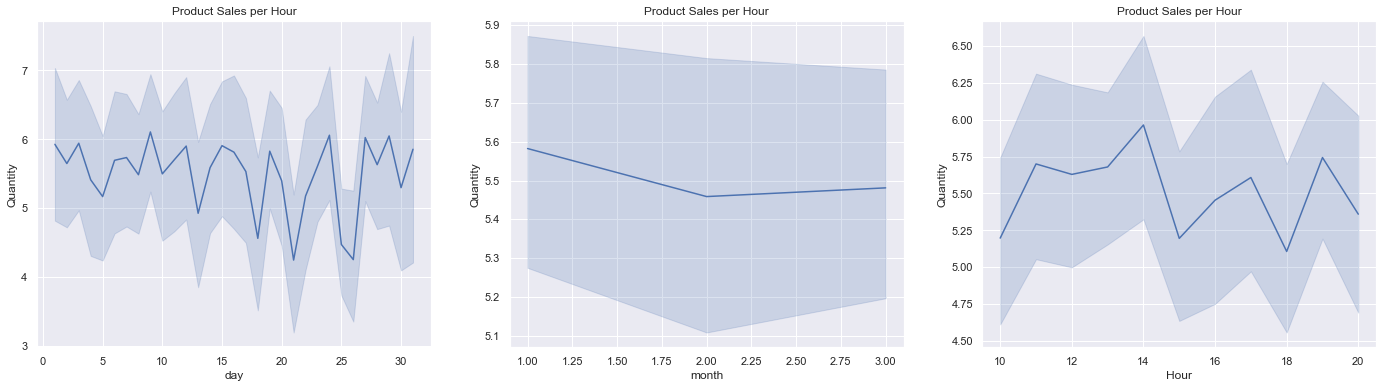

In [55]:
#f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))

day_quantity = sns.lineplot(x="day",  y = 'Quantity',data =df, ax=ax1).set_title("Product Sales per Hour")
month_quantity = sns.lineplot(x="month",  y = 'Quantity',data =df, ax=ax2).set_title("Product Sales per Hour")
hour_quantity = sns.lineplot(x="Hour",  y = 'Quantity',data =df, ax=ax3).set_title("Product Sales per Hour")

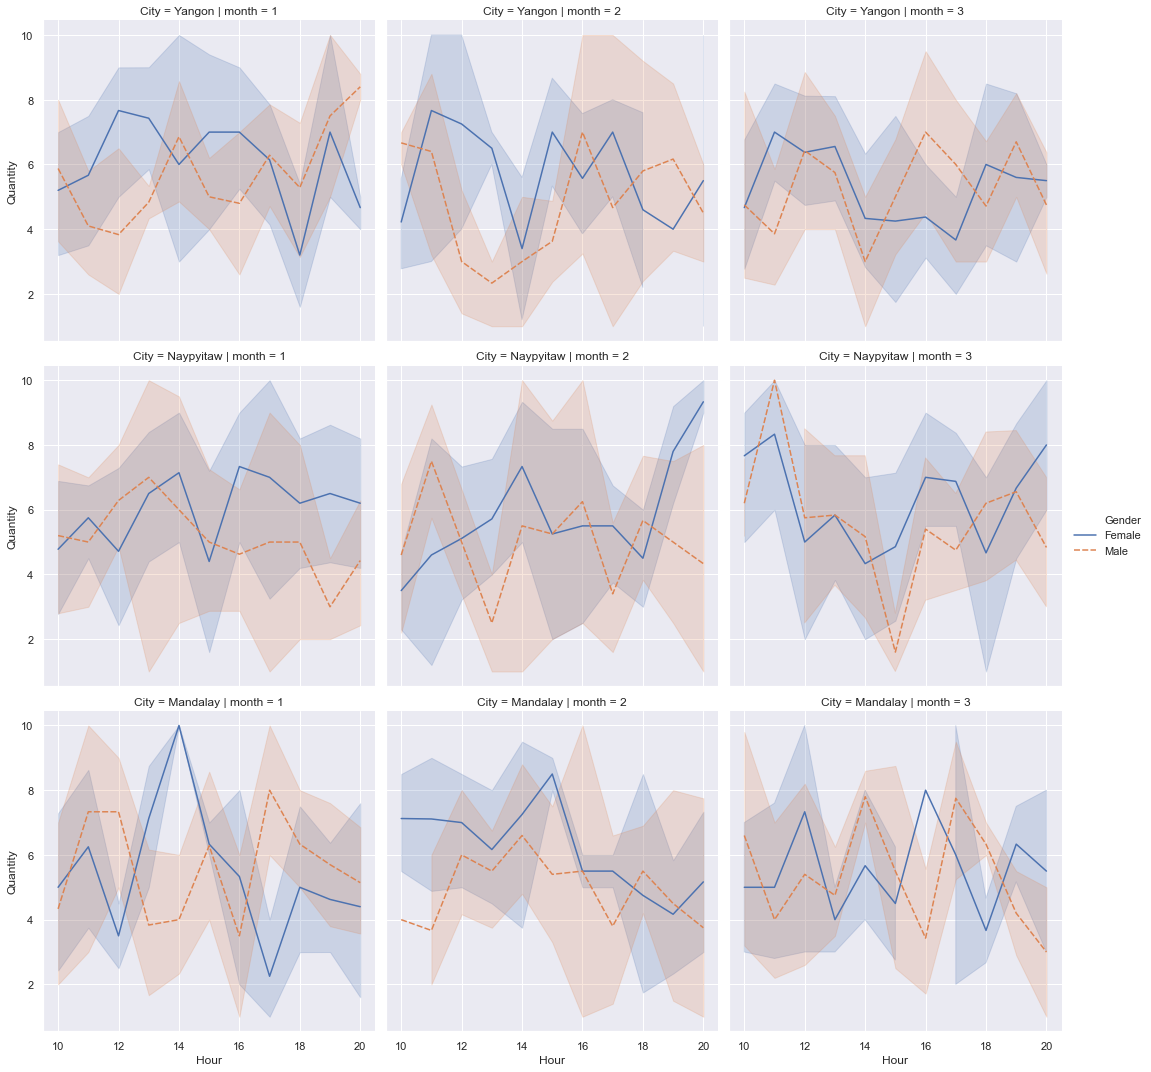

In [56]:
genderCount  = sns.relplot(x="Hour",  y = 'Quantity', 
                           col= 'month' , row= 'City', 
                           kind="line", hue="Gender", style="Gender", 
                           data =df)

## Sesgos

In [57]:
# Vamos a ver cuanto sesgo tienen los 10 primeros features

numeric_feats = df3.dtypes[df3.dtypes != "object"].index #elegimos los features que no sean objetos

numeric_feats =[j for j in numeric_feats if j != 'Date' and j!= 'Time'] #quitamos Date y Time para evitar errores

# Check the skew of all numerical features
skewed_feats = df3[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
Product_line_Health and beauty,1.938606
Product_line_Home and lifestyle,1.854852
Product_line_Sports and travel,1.795310
Product_line_Electronic accessories,1.757035
Product_line_Food and beverages,1.719820
Product_line_Fashion accessories,1.683604
Total,0.891230
Tax_5%,0.891230
gross_income,0.891230
cogs,0.891230



 mu = 322.97 and sigma = 245.76



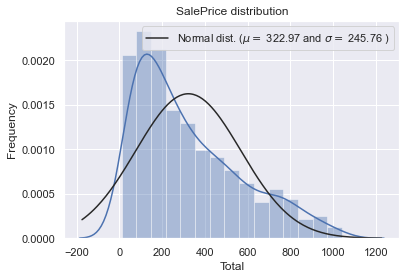

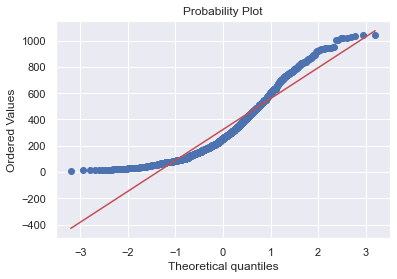

In [58]:
#histogram
sns.distplot(df['Total'] , fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['Total'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['Total'], plot=plt)
plt.show()

In [59]:
#skewness and kurtosis
print("Skewness: %f" %df['Total'].skew()) #sesgo
print("Kurtosis: %f" %df['Total'].kurt()) #kurtosis

Skewness: 0.892570
Kurtosis: -0.081885


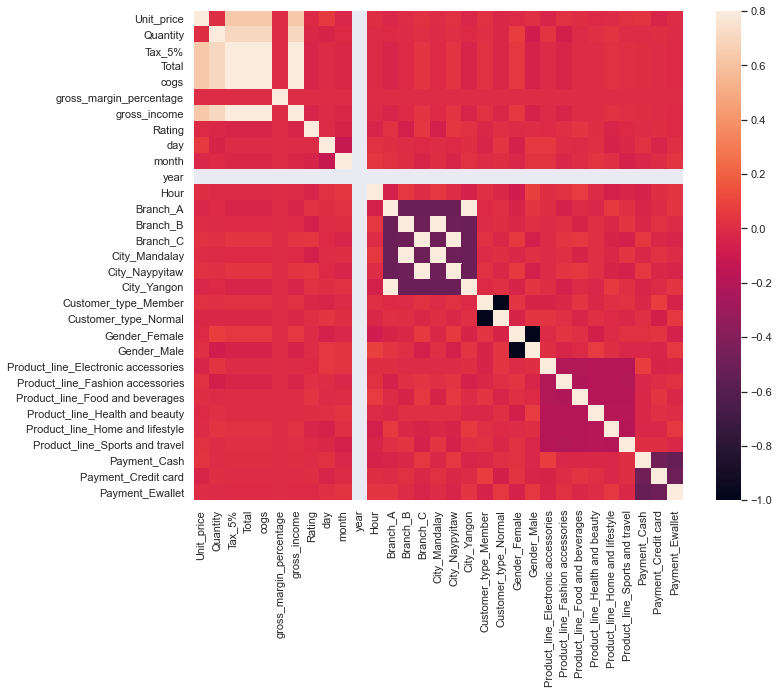

In [60]:
#correlation matrix
corrmat = df3.corr() #matriz de correlación
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cbar=True)

Index(['Total', 'cogs', 'Tax_5%', 'gross_income', 'Quantity', 'Unit_price'], dtype='object')


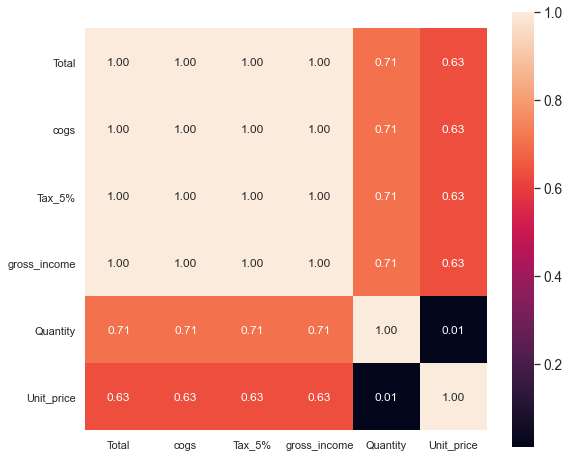

In [61]:
#Observamos los k valores mas correlacionados

k = 6 #number of variables for heatmap

#buscamos las 6 variables más relacionadas con Total, y con index nos devuelve el nombre de esas variables
#ordenadas según su correlación
cols = corrmat.nlargest(k, 'Total').index
print(cols)

cm = np.corrcoef(df3[cols].values.T) #Devuelve los coeficientes de correlación producto-momento de Pearson(ver teoria)
f, ax = plt.subplots(figsize=(9, 8))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

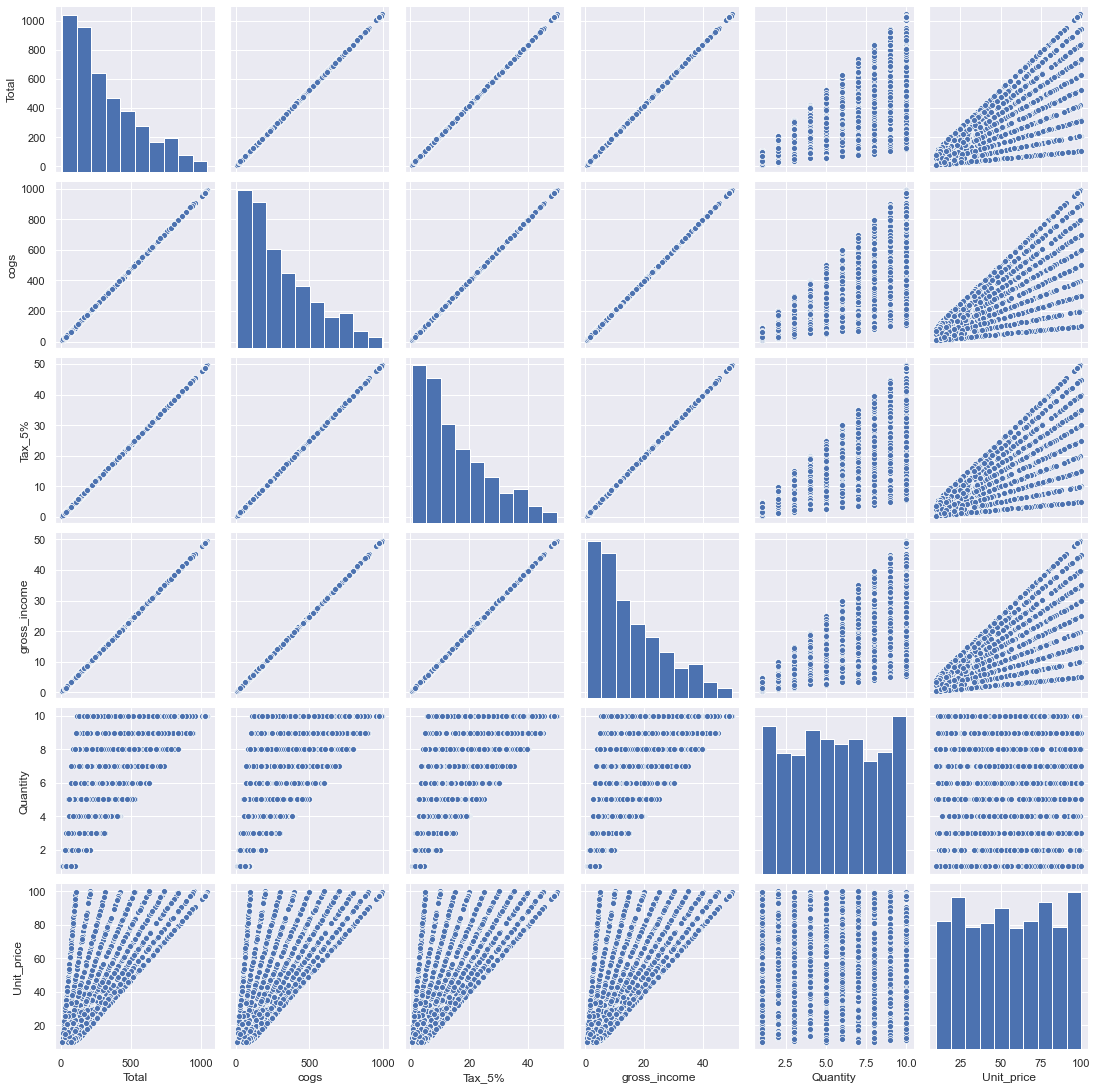

In [62]:
#scatterplot
sns.set()
sns.pairplot(df3[cols], size = 2.5)
plt.show()